# Change Finder

MaNiAC (AIQ 2021)

---

Ref:
- https://qiita.com/DS27/items/af375c1b8fdf2610b8a4
- https://argmax.jp/index.php?changefinder
- http://www.viewcom.or.jp/wp-content/uploads/2018/04/beb9489f9fe1a5e1c81ed8e6c292c942.pdf

---

## 概要

Change Finder は古典的な自己回帰モデル（AutoRegression model）を拡張させたもので，異常値検出の方法と平滑化を組み合わせることによって，異常値検出と同時に構造変化の検出も行うことができる手法と言われています．

以下の3ステップで変化点を検出します．

- Step 1: 確率モデルに学習させ，時系列の外れ値検知のみを行う
- Step 2: Step 1 で求めた外れ値スコアを時間方向に平滑化する
- Step 3: Step 2 で求めた新たな時系列データを確率モデルに学習させ，得られる確率密度関数列の外れ値スコアを元データの変化点のスコアとする

理論の詳細は，こちらの文献 (http://www.viewcom.or.jp/wp-content/uploads/2018/04/beb9489f9fe1a5e1c81ed8e6c292c942.pdf) を参照ください．

---

## 有効そうなデータの例

- 食品の購買データにおいて，ある日を境に急激に寒くなった場合，なべ物のような温かい料理に良く用いられる食材がその日を境に売れ行きが良くなる現象が観測されると予想できますが，この急激に気温が上がった変化点となる日の推測
- ある機器に接続されている配線における電流値をモニタリングしているとき，経年劣化などにより電流値が著しく変化した日の推測

In [ ]:
import numpy as np
from changefinder import ChangeFinder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data = np.concatenate(
    [
        np.random.normal(0.7, 0.05, 300),
        np.random.normal(1.5, 0.05, 300),
        np.random.normal(0.6, 0.05, 300),
        np.random.normal(1.3, 0.05, 300),
    ]
)
data.shape

(1200,)

In [ ]:
cf = ChangeFinder(r=0.01, order=1, smooth=7)

ret = []
for i in data:
    score = cf.update(i)
    ret.append(score)
    
len(ret)

1200

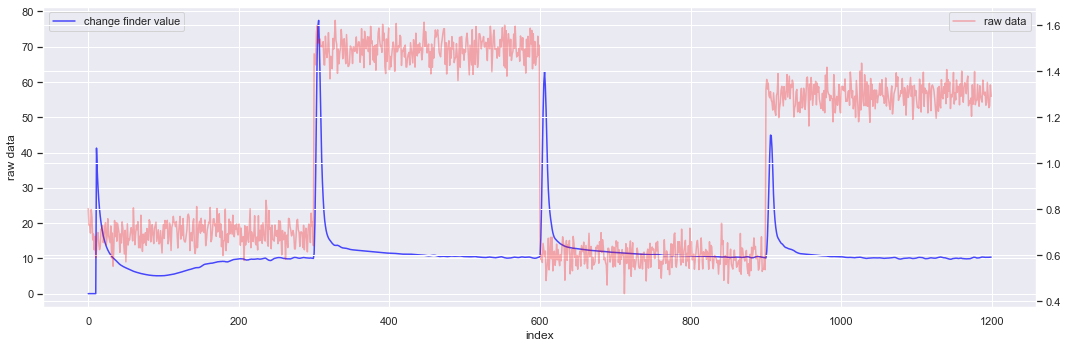

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot()

ax1.plot(ret, color="blue", alpha=0.7, label="change finder value")
ax2 = ax1.twinx()
ax2.plot(data, color="red", alpha=0.3, label="raw data")
ax1.set_xlabel("index")
ax1.set_ylabel("change finder value")
ax1.set_ylabel("raw data")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()
plt.close("all")